In [2]:
import audio_functions
import read_data as rd
import plot
from custom_dataset import MusicalInstrumentsDataset

# Musical Instruments Classifier

This project consists in building a neuronal network that classifies a musical instruments based on its sound. A custom dataset has been build from https://www.kaggle.com/datasets/soumendraprasad/musical-instruments-sound-dataset .

## Data

Let's take a look to metadata.

In [3]:
df = rd.read_file("train_data\Metadata_Train.csv")
df.head()

,FileName,Class
0,1-E1-Major 00.wav,Guitar
1,1-E1-Major 01.wav,Guitar
2,1-E1-Major 02.wav,Guitar
3,1-E1-Major 03.wav,Guitar
4,1-E1-Major 04.wav,Guitar


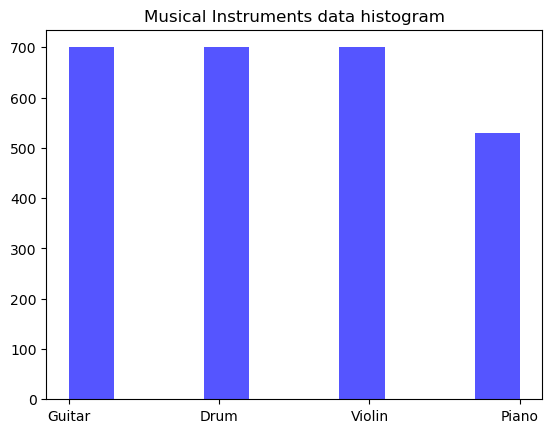

In [4]:
df["Class"]
plot.data_hist(df["Class"], title="Musical Instruments data histogram", show=True)